# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 72.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [66]:
data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [67]:
print(f'Shape: {data.shape}\nRows: {data.shape[0]}, Columns: {data.shape[1]}\nColumn Names: {data.columns}')

Shape: (4324, 9)
Rows: 4324, Columns: 9
Column Names: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


In [68]:
print(f'NaN values: {data.isnull().values.sum()}\nDuplicates: {data.duplicated().any()}')

NaN values: 3360
Duplicates: False


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [69]:
data.drop(data.columns[[0, 1]], axis = 1, inplace = True)

In [70]:
for i in range(4324):
  v = data.Price[i]
  if type(v)==str:
    f=float(v.replace(',',''))
    data.Price[i]=f

In [71]:
price_mean = data.Price.mean()
data['Price'].fillna(price_mean,inplace=True)

## Descriptive Statistics

In [72]:
data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,153.79,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    4324 non-null   object 
 1   Location        4324 non-null   object 
 2   Date            4324 non-null   object 
 3   Detail          4324 non-null   object 
 4   Rocket_Status   4324 non-null   object 
 5   Price           4324 non-null   float64
 6   Mission_Status  4324 non-null   object 
dtypes: float64(1), object(6)
memory usage: 236.6+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [74]:
print(data['Organisation'].value_counts())

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


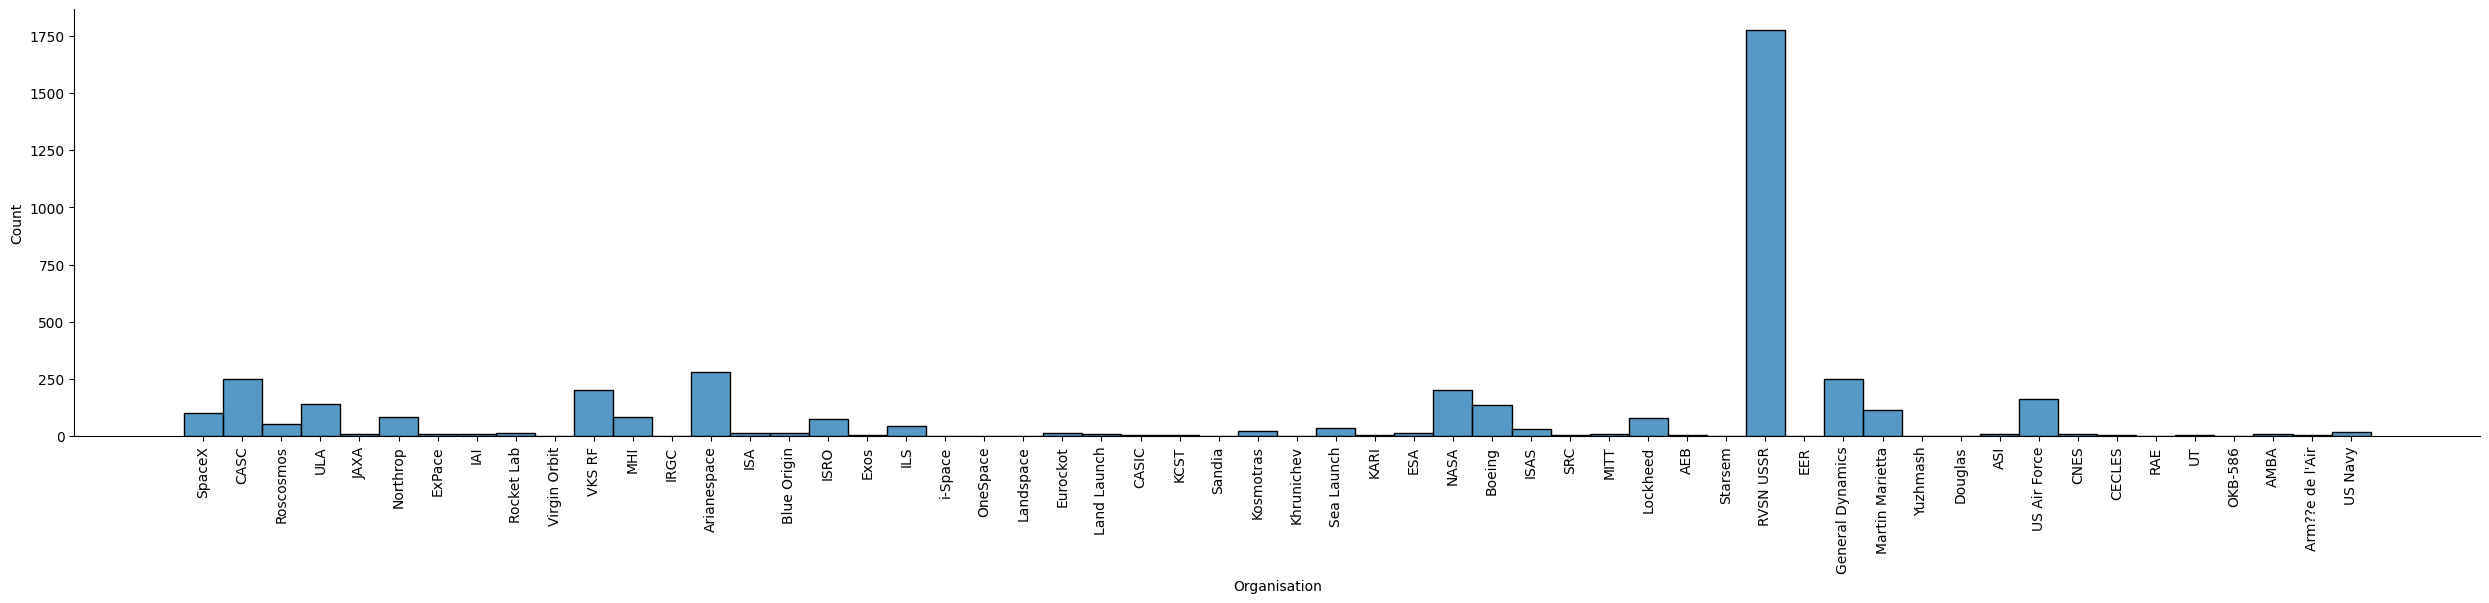

In [75]:
sns.displot(data, x=data.Organisation,aspect=5)
plt.xticks(rotation=90)
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [77]:
print(data.Rocket_Status.value_counts())

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [78]:
print(data.Mission_Status.value_counts())

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [79]:
data.describe()

,Price
count,"4,324.00"
mean,153.79
std,136.14
min,5.30
25%,153.79
50%,153.79
75%,153.79
max,"5,000.00"


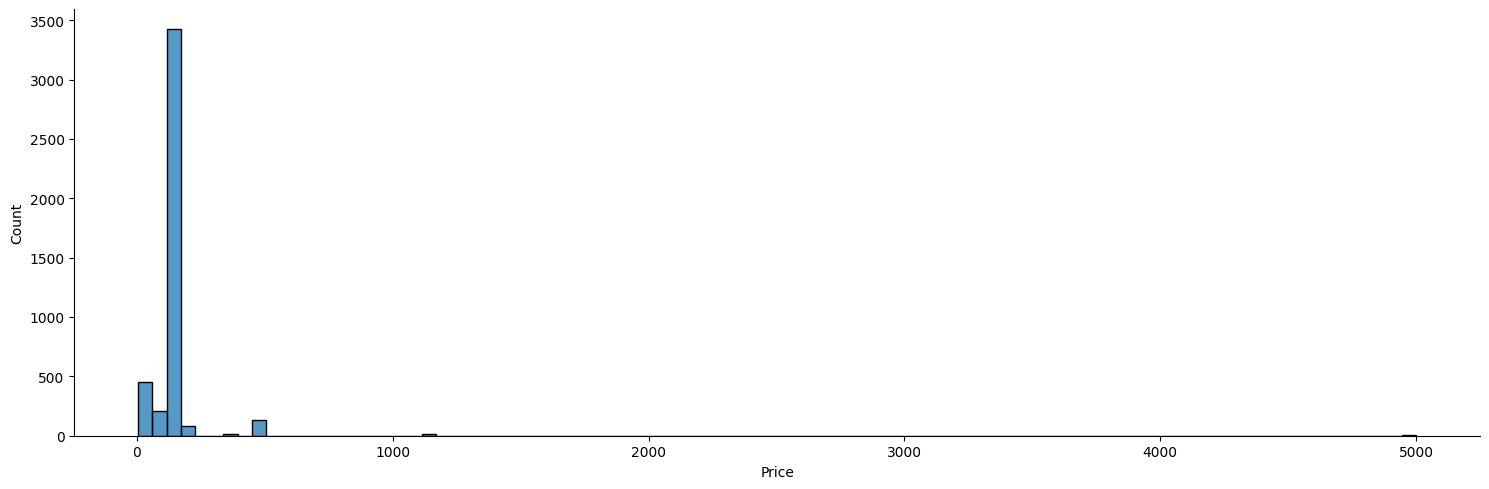

In [80]:
sns.displot(data=data, x=data['Price'],bins=90,aspect=3)
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [88]:
c = []
for i in data.Location:
  c.append(i.split()[-1])
country = pd.DataFrame({'Country':c})
data2 = pd.concat([data, country.reindex(data.index)], axis=1)
data2['Country'].value_counts()
data3=data2.replace(['Russia','Zealand','Iran','Site','Sea','Korea','Facility','Ocean','Canaria'],['Russian Federation','New Zealand','IRN','IRN','China','Korea, Republic of','USA','Russian Federation','USA'])

In [89]:
alpha3=[]
for i in data3.Country:
  r=countries.get(i).alpha3
  alpha3.append(r)
data3['iso']=alpha3

In [90]:
data3.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,iso
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,153.79,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA


In [91]:
launches_by_country=[]
for i in data3.iso.unique():
    launches_by_country.append(data3['iso'].value_counts()[i])

In [92]:
fig = px.choropleth( locations=data3.iso.unique(),  color=launches_by_country, hover_name=data3.iso.unique(), color_continuous_scale="matter",)
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [93]:
data_failures=data3[data3.Mission_Status!='Success']

In [94]:
failure_by_country=[]
for i in data_failures.iso.unique():
  failure_by_country.append(data_failures['iso'].value_counts()[i])

In [95]:
fig = px.choropleth( locations=data_failures.iso.unique(),  color=failure_by_country, hover_name=data_failures.iso.unique(), color_continuous_scale="matter",)
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [96]:
fig = px.sunburst(data3, path=['Country', 'Organisation', 'Mission_Status'])
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [97]:
data3.groupby(by='Organisation').sum()

<ipython-input-97-f686af9b3a09>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Price
Organisation,
AEB,461.38
AMBA,"1,230.34"
ASI,"1,384.13"
Arianespace,"44,488.97"
Arm??e de l'Air,615.17
Blue Origin,"1,845.51"
Boeing,"21,080.19"
CASC,"20,642.93"
CASIC,768.96


# Analyse the Amount of Money Spent by Organisation per Launch

In [98]:
data3.groupby(by='Organisation').mean()

<ipython-input-98-c5d5be1e797a>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Price
Organisation,
AEB,153.79
AMBA,153.79
ASI,153.79
Arianespace,159.46
Arm??e de l'Air,153.79
Blue Origin,153.79
Boeing,155.00
CASC,82.24
CASIC,153.79


# Chart the Number of Launches per Year

In [99]:
y = []
for i in data3.Date:
  y.append(i.split(' ')[3])
year = pd.DataFrame({'year':y})
data4 = pd.concat([data3, year.reindex(data3.index)], axis=1)

In [100]:
count_by_year = []
for i in data4.year.unique():
  count_by_year.append(data4['year'].value_counts()[i])

In [101]:
fig = px.bar(data4, x=data4.year.unique(), y=count_by_year)
fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [102]:
m = []
for i in data4.Date:
  m.append(i.split(' ')[1])
month = pd.DataFrame({'month':m})
data5 = pd.concat([data4, month.reindex(data4.index)], axis=1)

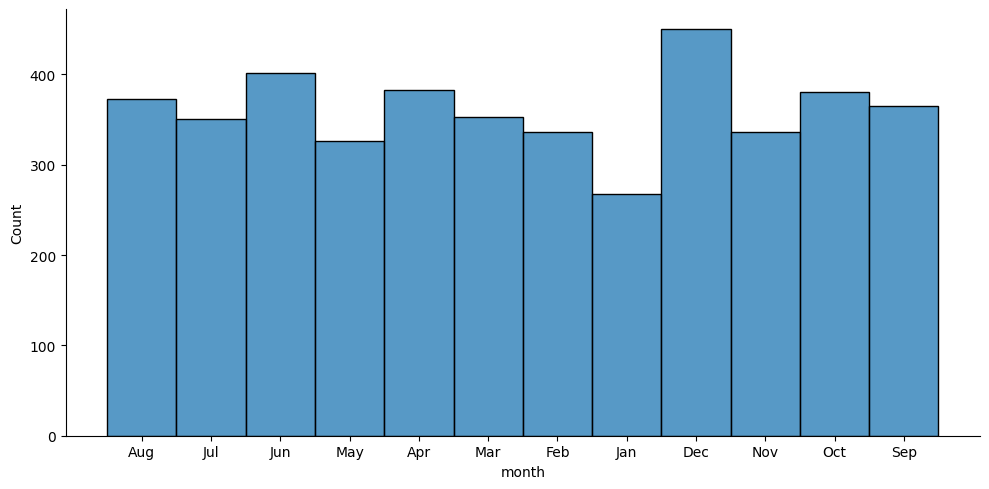

In [103]:
sns.displot(data=data5, x=data5['month'],aspect=2)
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [104]:
data_success = data5[data5.Mission_Status=='Success']
print(data_success.month.value_counts())

Dec    404
Jun    356
Oct    346
Apr    344
Aug    331
Sep    327
Mar    322
Jul    315
Feb    299
Nov    299
May    295
Jan    241
Name: month, dtype: int64


# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [105]:
mean_price_by_time = data5.groupby(by='year').mean()

<ipython-input-105-a8a24075e672>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



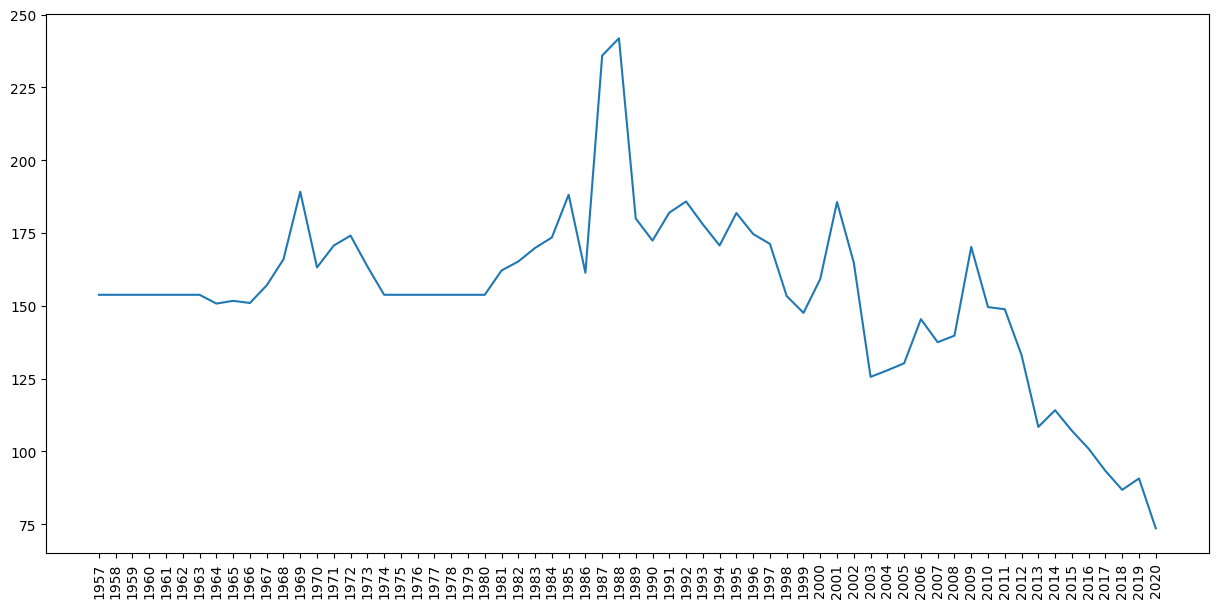

In [106]:
plt.figure(figsize=(15, 7))
plt.xticks(rotation=90)
display(plt.plot(mean_price_by_time))

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [107]:
data5.Organisation.value_counts()

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [108]:
I=min(data5[data5['year']=='1991'].index)
data_coldwar = data5.iloc[I:]

In [109]:
launches_by_usa = data_coldwar['Country'].value_counts()['USA']
ussr = ['Armenia', 'Azerbaijan', 'Belarus', 'Estonia', 'Georgia', 'Kazakhstan', 'Kyrgyzstan' ,'Latvia', 'Lithuania' ,'Moldova' ,'Russia' ,'Tajikistan', 'Turkmenistan', 'Ukraine', 'Uzbekistan']
launches_by_ussr = 0
for i in ussr:
  try:
    launches_by_ussr += data_coldwar['Country'].value_counts()[i]
  except KeyError:
    pass

In [110]:
print(f"Launches of USA:{launches_by_usa} USSR:{launches_by_ussr}")

Launches of USA:662 USSR:582


In [111]:
data_coldwar_success= data_coldwar[data_coldwar.Mission_Status=='Success']
success_by_ussr=0
for i in ussr:
  try:
    success_by_ussr += data_coldwar_success['Country'].value_counts()[i]
  except KeyError:
    pass

In [112]:
print(f"Successful Launches of USA:{data_coldwar_success['Country'].value_counts()['USA']} USSR:{success_by_ussr}")

Successful Launches of USA:536 USSR:499


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [113]:
fig = px.pie(values=[launches_by_usa,launches_by_ussr],names=['USA','USSR'], title='Launches')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [114]:
data_coldwar_usa= data_coldwar[data_coldwar.Country=='USA']
coldwar_count_by_year_usa = []
for i in data_coldwar_usa.year.unique():
  coldwar_count_by_year_usa.append(data_coldwar_usa['year'].value_counts()[i])

In [ ]:
data_coldwar_ussr=pd.DataFrame()
for i in ussr:
  try:
    d=data_coldwar[data_coldwar.Country==i]
    data_coldwar_ussr=data_coldwar_ussr.append(d)
  except KeyError:
    pass
coldwar_count_by_year_ussr = []
for i in data_coldwar_ussr.year.unique():
  coldwar_count_by_year_ussr.append(data_coldwar_ussr['year'].value_counts()[i])

In [125]:
fig = px.bar(x=data_coldwar_usa.year.unique(), y=coldwar_count_by_year_usa, labels={'x':'year','y':'number of launches'},title="Laucnches of USA vs USSR by year")
fig.add_bar(x=data_coldwar_ussr.year.unique(),y=coldwar_count_by_year_ussr,name="USSR")
fig.show()

## Chart the Total Number of Mission Failures Year on Year.

In [126]:
data_failure_usa=data_coldwar_usa[data_coldwar_usa.Mission_Status!='Success']
data_failure_ussr=data_coldwar_ussr[data_coldwar_ussr.Mission_Status!='Success']

In [127]:
fail_count_by_year_usa = []
for i in data_failure_usa.year.unique():
  fail_count_by_year_usa.append(data_failure_usa['year'].value_counts()[i])

In [128]:
fail_count_by_year_ussr = []
for i in data_failure_ussr.year.unique():
  fail_count_by_year_ussr.append(data_failure_ussr['year'].value_counts()[i])

In [129]:
fig = px.bar( x=data_failure_usa.year.unique(), y=fail_count_by_year_usa, labels={'x':'year','y':'number of launches'},title="Failure of USA vs USSR by year")
fig.add_bar(x=data_failure_ussr.year.unique(),y=fail_count_by_year_ussr,name="USSR")
fig.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [130]:
percent_failures_ussr=[]
for i in range(len(coldwar_count_by_year_ussr)):
  y=data_coldwar_ussr.year.unique()[i]
  if y not in data_failure_ussr.year.unique():
    fail_count_by_year_ussr.insert(i, 0)
    r=0
  else:
    r=round((fail_count_by_year_ussr[i]/coldwar_count_by_year_ussr[i])*100,2)
  percent_failures_ussr.append(r)

In [131]:
percent_failures_usa=[]
for i in range(len(coldwar_count_by_year_usa)):
  y=data_coldwar_usa.year.unique()[i]
  if y not in data_failure_usa.year.unique():
    fail_count_by_year_usa.insert(i, 0)
    r=0
  else:
    r=round((fail_count_by_year_usa[i]/coldwar_count_by_year_usa[i])*100,2)
  percent_failures_usa.append(r)

In [132]:
fig1=px.line(x=data_coldwar_usa.year.unique()[:-1], y=percent_failures_usa[:-1], labels={'x':'year','y':'percent of failures'},title='percentage failure of USA by year')
fig1.show()
fig2=px.line(x=data_coldwar_ussr.year.unique(), y=percent_failures_ussr, labels={'x':'year','y':'percent of failures'},title='percentage failure of USSR by year')
fig2.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [133]:
fig = px.histogram(data5, x="year", color="Country")
fig.show()

In [134]:
data6=data5.groupby(by=['year','Country']).count()
data6.tail(20)

Organisation  Location  Date  Detail  Rocket_Status  \
year Country                                                                   
2018 USA                           33        33    33      33             33   
2019 China                         34        34    34      34             34   
     France                         9         9     9       9              9   
     IRN                            3         3     3       3              3   
     India                          6         6     6       6              6   
     Japan                          2         2     2       2              2   
     Kazakhstan                    13        13    13      13             13   
     Mexico                         3         3     3       3              3   
     New Zealand                    6         6     6       6              6   
     Russian Federation             9         9     9       9              9   
     USA                           24        24    24      24             24   
2020 China                         22        22    22      22             22   
     France                         2         2     2       2              2   
     IRN                            2         2     2       2              2   
     Israel                         1         1     1       1              1   
     Japan                          3         3     3       3              3   
     Kazakhstan                     6         6     6       6              6   
     New Zealand                    3         3     3       3              3   
     Russian Federation             3         3     3       3              3   
     USA                           21        21    21      21             21   

                         Price  Mission_Status  iso  month  
year Country                                                
2018 USA                    33              33   33     33  
2019 China                  34              34   34     34  
     France                  9               9    9      9  
     IRN                     3               3    3      3  
     India                   6               6    6      6  
     Japan                   2               2    2      2  
     Kazakhstan             13              13   13     13  
     Mexico                  3               3    3      3  
     New Zealand             6               6    6      6  
     Russian Federation      9               9    9      9  
     USA                    24              24   24     24  
2020 China                  22              22   22     22  
     France                  2               2    2      2  
     IRN                     2               2    2      2  
     Israel                  1               1    1      1  
     Japan                   3               3    3      3  
     Kazakhstan              6               6    6      6  
     New Zealand             3               3    3      3  
     Russian Federation      3               3    3      3  
     USA                    21              21   21     21

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [135]:
fig = px.histogram(data5, x="year", color="Organisation")
fig.show()

In [136]:
data7=data5.groupby(by=['year','Organisation']).count()

In [137]:
data7.head(20)

Location  Date  Detail  Rocket_Status  Price  \
year Organisation                                                     
1957 RVSN USSR                2     2       2              2      2   
     US Navy                  1     1       1              1      1   
1958 AMBA                     7     7       7              7      7   
     NASA                     2     2       2              2      2   
     RVSN USSR                5     5       5              5      5   
     US Air Force             2     2       2              2      2   
     US Navy                 12    12      12             12     12   
1959 General Dynamics         1     1       1              1      1   
     NASA                     1     1       1              1      1   
     RVSN USSR                4     4       4              4      4   
     US Air Force            10    10      10             10     10   
     US Navy                  4     4       4              4      4   
1960 General Dynamics         5     5       5              5      5   
     NASA                     4     4       4              4      4   
     RVSN USSR                9     9       9              9      9   
     US Air Force            21    21      21             21     21   
1961 General Dynamics         8     8       8              8      8   
     NASA                    12    12      12             12     12   
     RVSN USSR                9     9       9              9      9   
     US Air Force            23    23      23             23     23   

                       Mission_Status  Country  iso  month  
year Organisation                                           
1957 RVSN USSR                      2        2    2      2  
     US Navy                        1        1    1      1  
1958 AMBA                           7        7    7      7  
     NASA                           2        2    2      2  
     RVSN USSR                      5        5    5      5  
     US Air Force                   2        2    2      2  
     US Navy                       12       12   12     12  
1959 General Dynamics               1        1    1      1  
     NASA                           1        1    1      1  
     RVSN USSR                      4        4    4      4  
     US Air Force                  10       10   10     10  
     US Navy                        4        4    4      4  
1960 General Dynamics               5        5    5      5  
     NASA                           4        4    4      4  
     RVSN USSR                      9        9    9      9  
     US Air Force                  21       21   21     21  
1961 General Dynamics               8        8    8      8  
     NASA                          12       12   12     12  
     RVSN USSR                      9        9    9      9  
     US Air Force                  23       23   23     23